In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("D:/delivery_time.csv")

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [6]:
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

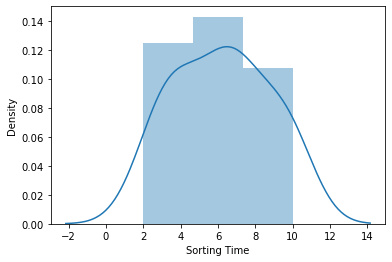

In [7]:
sns.distplot(data['Sorting Time'])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

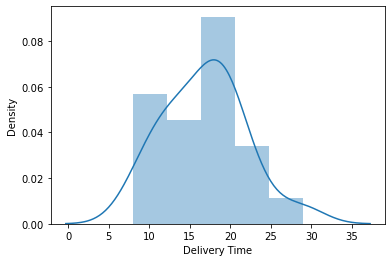

In [8]:
sns.distplot(data['Delivery Time'])

In [9]:
data=data.rename({'Delivery Time':'DT', 'Sorting Time':'ST'},axis=1)

In [10]:
data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [11]:
import statsmodels.formula.api as smf

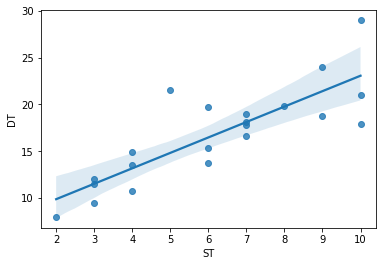

In [12]:
sns.regplot(x=data['ST'],y=data['DT'],data=data)
model=smf.ols("DT ~ ST",data=data).fit()
model

In [13]:
model

In [14]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [15]:
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [16]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [17]:
y=(6.582734) + (1.649020)*5

In [18]:
y

14.827834

In [19]:
newtime=pd.Series([2,4,6,8,10])

In [20]:
pred=pd.DataFrame(newtime,columns=['ST'])

In [21]:
pred

,ST
0,2
1,4
2,6
3,8
4,10


In [22]:
model.predict(pred)

0     9.880774
1    13.178814
2    16.476853
3    19.774893
4    23.072933
dtype: float64

# Log Transformation

In [23]:
x_log=np.log(data['ST'])
y_log=np.log(data['DT'])

In [24]:
model =smf.ols("y_log~ x_log",data = data).fit()

In [25]:
model

In [26]:
model.params

Intercept    1.741987
x_log        0.597522
dtype: float64

In [28]:
print(model.pvalues,'\n', model.tvalues)

Intercept    5.921137e-11
x_log        1.601539e-07
dtype: float64 
 Intercept    13.085552
x_log         8.024484
dtype: float64


In [30]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [31]:
y_log=(1.741987) + (0.597522)*5

In [32]:
y_log

4.729597

In [33]:
newtime=pd.Series([2,4,6,8,10])

In [34]:
pred=pd.DataFrame(newtime,columns=['x_log'])

In [35]:
model.predict(pred)

0    2.937032
1    4.132076
2    5.327121
3    6.522166
4    7.717210
dtype: float64

In [37]:
data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# improving model using squareroot transformation

In [38]:
data.insert(len(data.columns),'A_sqart',
           np.sqrt(data.iloc[:,0]))
data

,DT,ST,A_sqart
0,21.00,10,4.582576
1,13.50,4,3.674235
2,19.75,6,4.444097
3,24.00,9,4.898979
4,29.00,10,5.385165
5,15.35,6,3.917908
6,19.00,7,4.358899
7,9.50,3,3.082207
8,17.90,10,4.230839
9,18.75,9,4.330127


In [39]:
model=smf.ols("DT~A_sqart",data = data).fit()


In [40]:
model

In [41]:
model.params

Intercept   -15.902667
A_sqart       8.068752
dtype: float64

In [42]:
print(model.pvalues,'\n',model.tvalues)

Intercept    8.158463e-15
A_sqart      9.829837e-21
dtype: float64 
 Intercept   -21.550902
A_sqart      44.806348
dtype: float64


In [44]:
(model.rsquared,model.rsquared_adj)

(0.9906247323423885, 0.9901312972025141)

In [45]:
y_quad=(-3.930699)+(3.977225)*5

In [50]:
 y_quad

15.955426

In [47]:
newtime=pd.Series([2,4,6,8,10])

In [48]:
pred=pd.DataFrame(newtime,columns=['A_sqart'])
pred

,A_sqart
0,2
1,4
2,6
3,8
4,10


# improving model with square transformation

In [51]:
data['Squar_del_time']=data.apply(lambda row:row.DT**2,axis =1)
data

,DT,ST,A_sqart,Squar_del_time
0,21.00,10,4.582576,441.0000
1,13.50,4,3.674235,182.2500
2,19.75,6,4.444097,390.0625
3,24.00,9,4.898979,576.0000
4,29.00,10,5.385165,841.0000
5,15.35,6,3.917908,235.6225
6,19.00,7,4.358899,361.0000
7,9.50,3,3.082207,90.2500
8,17.90,10,4.230839,320.4100
9,18.75,9,4.330127,351.5625


In [52]:
model=smf.ols('Squar_del_time~ST',data=data).fit()


In [53]:
model

In [54]:
model.params

Intercept   -37.440078
ST           55.553783
dtype: float64

In [55]:
print(model.pvalues,'\n',model.tvalues)

Intercept    0.593778
ST           0.000035
dtype: float64 
 Intercept   -0.542504
ST           5.368383
dtype: float64


In [56]:
(model.rsquared,model.rsquared_adj)

(0.6026728443618878, 0.5817608888019872)

# improving model with reciprocol transformation

In [57]:
reciprocal_del_time=1/data["DT"]

In [59]:
reciprocal_del_time

0     0.047619
1     0.074074
2     0.050633
3     0.041667
4     0.034483
5     0.065147
6     0.052632
7     0.105263
8     0.055866
9     0.053333
10    0.050429
11    0.093023
12    0.059952
13    0.086957
14    0.083126
15    0.067204
16    0.072727
17    0.055218
18    0.125000
19    0.056085
20    0.046512
Name: DT, dtype: float64

In [60]:
model=smf.ols('reciprocal_del_time~ST',data=data).fit()

In [61]:
model

In [62]:
model.params

Intercept    0.110682
ST          -0.007287
dtype: float64

In [64]:
print(model.pvalues,'\n',model.tvalues)

Intercept    9.669983e-12
ST           4.059187e-06
dtype: float64 
 Intercept    14.525932
ST           -6.378315
dtype: float64


In [65]:
(model.rsquared,model.rsquared_adj)

(0.6816508639250471, 0.6648956462368918)

# improving model using Box-cox transformation

In [66]:
from scipy.stats import boxcox
bcx_target, lam=boxcox(data["DT"])

In [67]:
model=smf.ols('bcx_target~ST',data=data).fit()

In [68]:
model.params

Intercept    3.714122
ST           0.468564
dtype: float64

In [69]:
print(model.pvalues,'\n',model.tvalues)

Intercept    1.790789e-07
ST           2.093830e-06
dtype: float64 
 Intercept    7.964349
ST           6.700806
dtype: float64


In [70]:
(model.rsquared,model.rsquared_adj)

(0.7026641437912345, 0.6870148882012995)

# improving model using Yeo-Johnson Transformation

In [71]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(data["DT"]) 

In [72]:
model=smf.ols('yf_target~ST',data=data).fit()

In [73]:
model.params

Intercept    3.967570
ST           0.424596
dtype: float64

In [74]:
print(model.pvalues,'\n',model.tvalues)

Intercept    1.440405e-08
ST           2.095432e-06
dtype: float64 
 Intercept    9.388311
ST           6.700429
dtype: float64


In [75]:
(model.rsquared,model.rsquared_adj)

(0.7026406506507266, 0.6869901585797122)